In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

# 读取MAT文件   
data1 = loadmat('0_0.mat')  # 正常信号
data2 = loadmat('21_1.mat') # 0.021英寸 内圈
data3 = loadmat('21_2.mat') # 0.021英寸 滚珠
data4 = loadmat('21_3.mat') # 0.021英寸 外圈
# 注意，读取出来的data是字典格式，可以通过函数type(data)查看。 

In [9]:
# DE - drive end accelerometer data 驱动端加速度数据
data_list1 = data1['X097_DE_time'].reshape(-1) 
data_list2 = data2['X209_DE_time'].reshape(-1)  
data_list3 = data3['X222_DE_time'].reshape(-1) 
data_list4 = data4['X234_DE_time'].reshape(-1) 

time_step= 1024
# 划窗取值（大多数窗口大小为1024）
data_list1 = data_list1[0:time_step]
data_list2 = data_list2[0:time_step]
data_list3 = data_list3[0:time_step]
data_list4 = data_list4[0:time_step]

x_list = [x for x in range(time_step)]

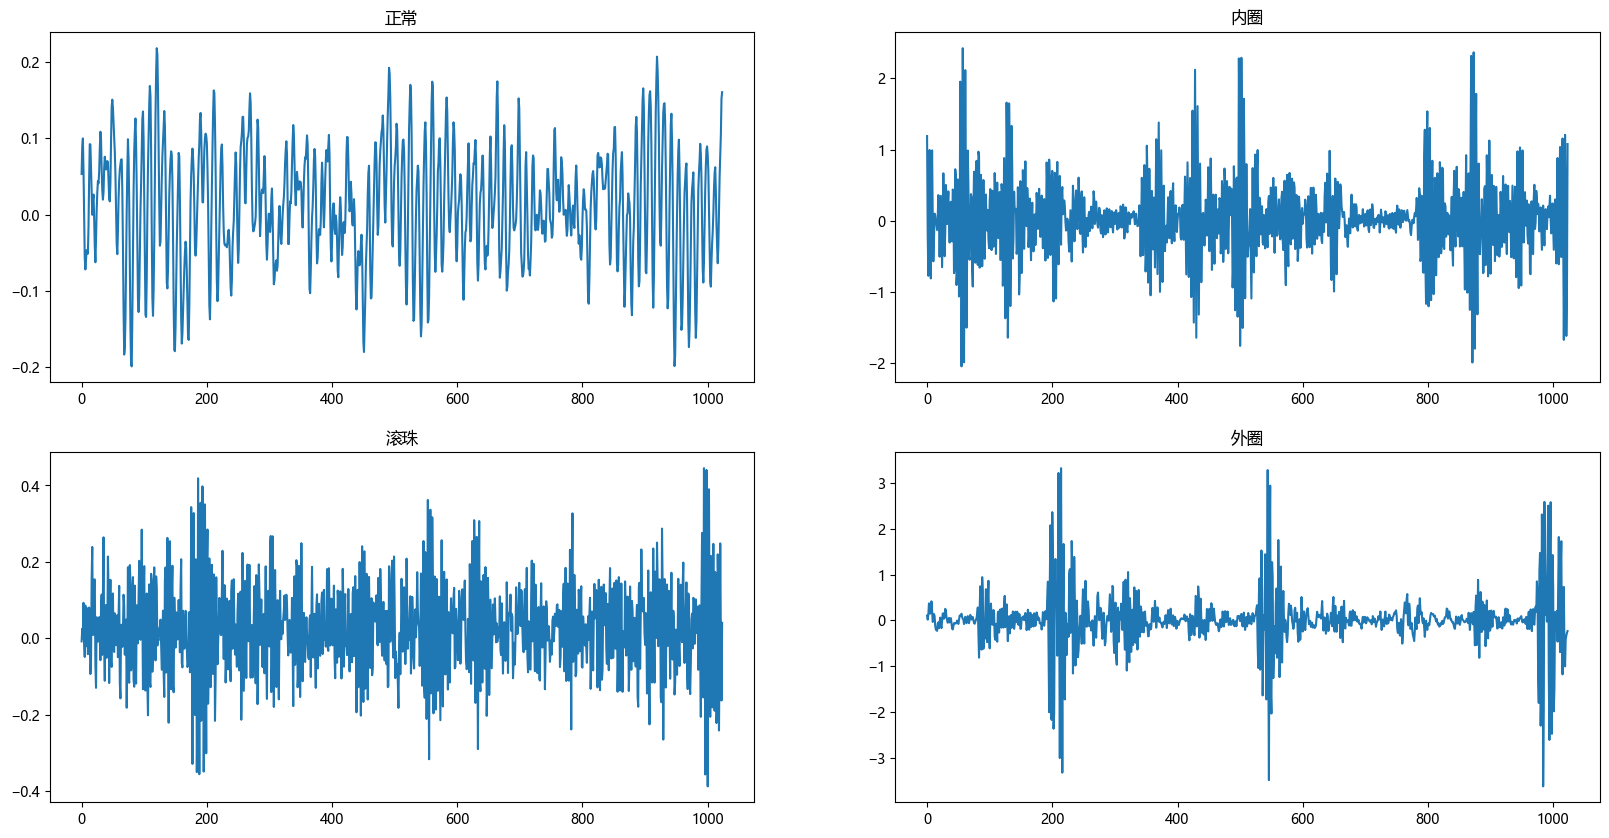

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(data_list1)
plt.title('正常')
plt.subplot(2,2,2)
plt.plot(data_list2)
plt.title('内圈')
plt.subplot(2,2,3)
plt.plot(data_list3)
plt.title('滚珠')
plt.subplot(2,2,4)
plt.plot(data_list4)
plt.title('外圈')

plt.show()

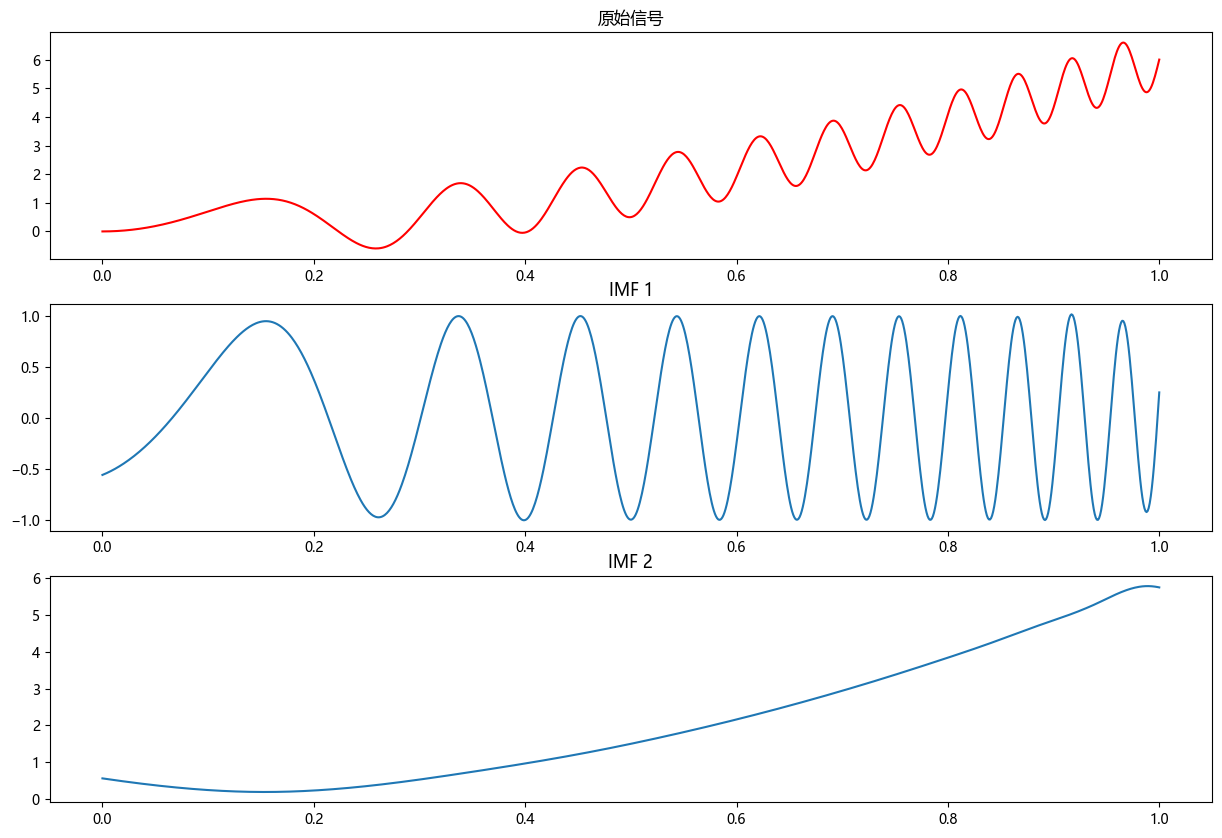

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

# 生成一个示例信号
t = np.linspace(0, 1, 1000)
signal = np.sin(11*2*np.pi*t*t) + 6*t*t

# 创建 EMD 对象
emd = EMD()
# 对信号进行经验模态分解
IMFs = emd(signal)

plt.figure(figsize=(15,10))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(t, signal, 'r')
plt.title("原始信号")

for num, imf in enumerate(IMFs):
    plt.subplot(len(IMFs)+1, 1, num+2)
    plt.plot(t, imf)
    plt.title("IMF "+str(num+1))

plt.show()

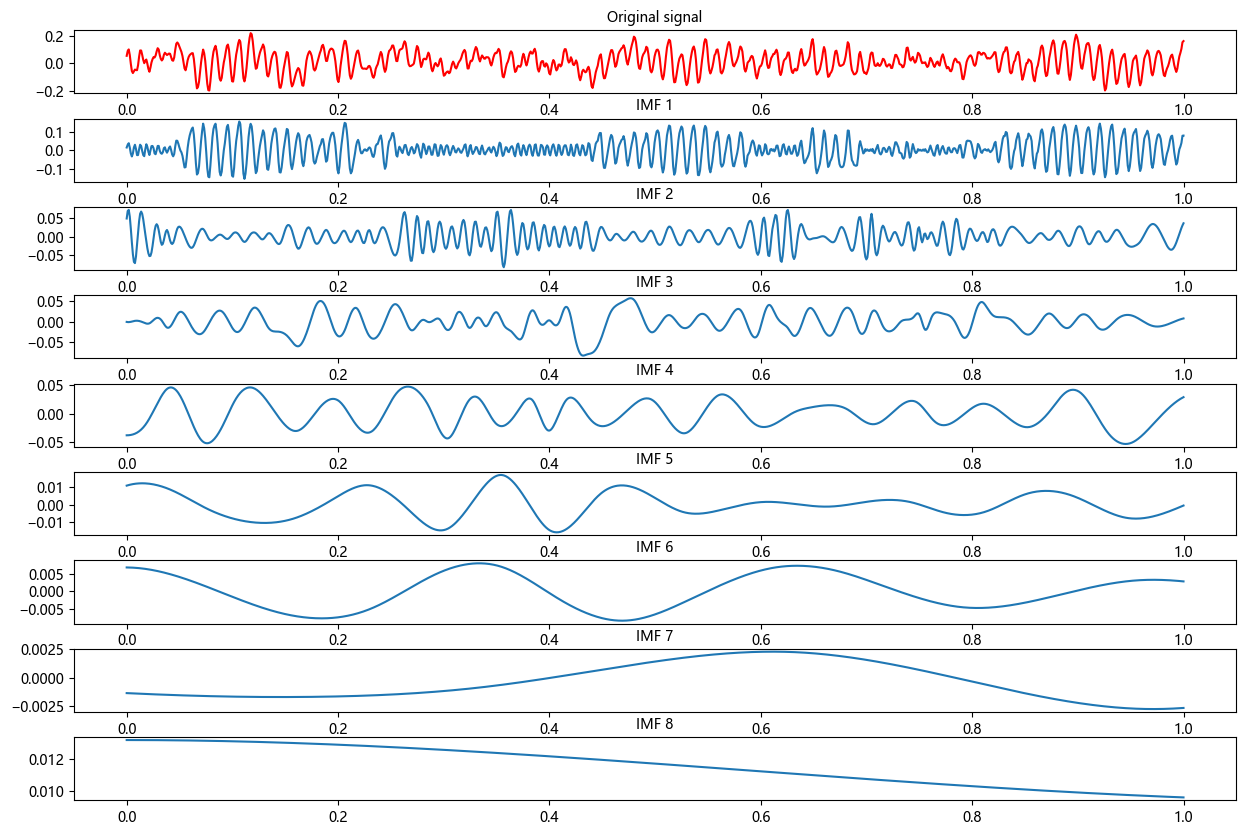

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

t = np.linspace(0, 1, time_step)
data = np.array(data_list1)
# 创建 EMD 对象
emd = EMD()

# 对信号进行经验模态分解
IMFs = emd(data, max_imf = 10)

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(t, data, 'r')
plt.title("Original signal", fontsize=10)

for num, imf in enumerate(IMFs):
    plt.subplot(len(IMFs)+1, 1, num+2)
    plt.plot(t, imf)
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

In [36]:
from joblib import dump, load
# 加载训练集
train_xdata = load('trainX_1024_10c')
print(train_xdata.shape)  # torch.Size([1631, 1024])
train_xdata = train_xdata.view(1631, 1, 1024)  
train_xdata

torch.Size([1631, 1024])


tensor([[[ 0.0532,  0.0887,  0.0997,  ...,  0.1045,  0.1519,  0.1602]],

        [[ 0.0774,  0.0966,  0.0983,  ...,  0.1089,  0.0476, -0.0023]],

        [[ 0.1348,  0.0851,  0.0150,  ...,  0.0002, -0.0219, -0.0711]],

        ...,

        [[-0.0282,  0.0566, -0.0900,  ..., -0.0428,  0.0184,  0.1733]],

        [[-0.1190, -0.0056,  0.0474,  ...,  0.1220, -0.0918,  0.0129]],

        [[ 0.0037,  0.0225, -0.0777,  ...,  0.1071, -0.0333, -0.0388]]])

In [35]:
x1 = train_xdata[0]
print(len(x1[0]))
x1

1024


tensor([[0.0532, 0.0887, 0.0997,  ..., 0.1045, 0.1519, 0.1602]])

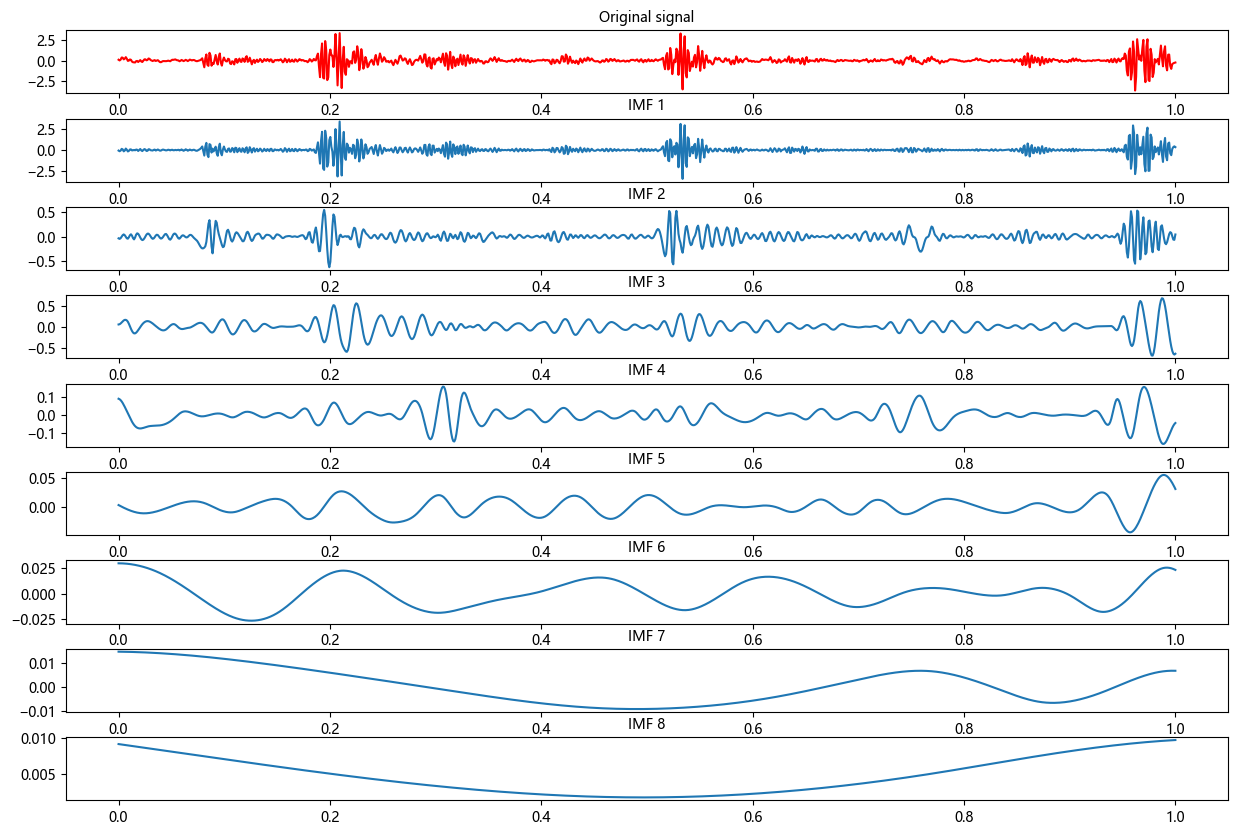

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

t = np.linspace(0, 1, time_step)
data = np.array(data_list4)
# 创建 EMD 对象
emd = EMD()

# 对信号进行经验模态分解
IMFs = emd(data)

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(t, data, 'r')
plt.title("Original signal", fontsize=10)

for num, imf in enumerate(IMFs):
    plt.subplot(len(IMFs)+1, 1, num+2)
    plt.plot(t, imf)
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

In [27]:
print(IMFs.shape)
IMFs

(8, 1024)


array([[-0.0619667 , -0.14027749, -0.06654955, ...,  0.3534885 ,
         0.43898554,  0.34598122],
       [-0.03572544, -0.04645106, -0.03229064, ..., -0.06017896,
        -0.06611865,  0.04251982],
       [ 0.05359862,  0.0595862 ,  0.0769469 , ..., -0.64435864,
        -0.66709679, -0.64720063],
       ...,
       [ 0.02946325,  0.02945707,  0.02943853, ...,  0.0239494 ,
         0.02352461,  0.02304556],
       [ 0.01492879,  0.01492321,  0.01491706, ...,  0.0068865 ,
         0.00688045,  0.00686872],
       [ 0.00919264,  0.00917254,  0.00915243, ...,  0.00973475,
         0.00974306,  0.0097512 ]])

In [44]:
import numpy as np
from PyEMD import EMD

# 加载训练集
train_xdata = load('trainX_1024_10c')
data = np.array(train_xdata)

# 创建 EMD 对象
emd = EMD()

print("测试集：", len(data))
count_min = 0
count_max = 0
count_7 = 0
# 对数据进行EMD分解
for i in range(1631):
    imfs = emd(data[i], max_imf=8)  # max_imf=8
    if len(imfs) > 8 :
        count_max += 1
    elif len(imfs) < 7:
        count_min += 1
    elif len(imfs) == 7:
        count_7 += 1


print("分解结果IMF大于8：", count_max)
print("分解结果IMF小于7：", count_min)
print("分解结果IMF等于7：", count_7)

测试集： 1631
分解结果IMF大于8： 294
分解结果IMF小于7： 10
分解结果IMF等于7： 229


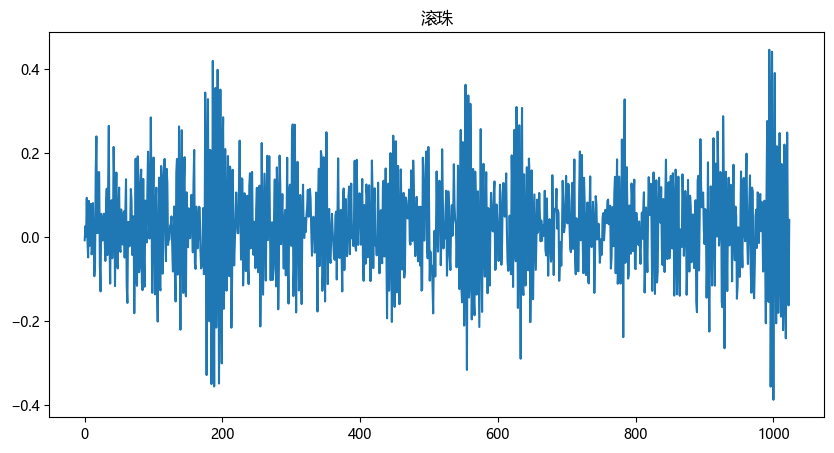

In [46]:
plt.figure(figsize=(10,5))
plt.plot(data_list3)
plt.title('滚珠')
plt.show()